Genetic Algorithm is the way to optimize a process. In optimization, we start with some kind of initial values for the variables used in the experiment. Because these values may not be the best ones to use, we should change them until getting the best ones. But it is very important to do optimization because a classifier may produce a bad classification accuracy not because, for example, the data is noisy or the used learning algorithm is weak but due to the bad selection of the learning parameters initial values.

Looking at various natural species, we can note how they evolve and adapt to their environments. We can benefit from such already existing natural systems and their natural evolution to create our artificial systems doing the same job. This is called bionics. For example, the plane is based on how the birds fly, radar comes from bats, submarine invented based on fish, and so on. As a result, principles of some optimization algorithms comes from nature. For example, Genetic Algorithm (GA) has its core idea from Charles Darwin’s theory of natural evolution “survival of the fittest”. 

The genetic algorithm is a random-based classical evolutionary algorithm. By random here we mean that in order to find a solution using the GA, random changes applied to the current solutions to generate new ones. Note that GA may be called Simple GA (SGA) due to its simplicity compared to other EAs

GA works on a population consisting of some solutions where the population size (popsize) is the number of solutions. Each solution is called individual. Each individual solution has a chromosome. The chromosome is represented as a set of parameters (features) that defines the individual. Each chromosome has a set of genes. Each gene is represented by somehow such as being represented as a string of 0s and 1s.

Also, each individual has a fitness value. To select the best individuals, a fitness function is used. The result of the fitness function is the fitness value representing the quality of the solution. The higher the fitness value the higher the quality the solution. Selection of the best individuals based on their quality is applied to generate what is called a mating pool where the higher quality individual has higher probability of being selected in the mating pool.

In [1]:

import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:

#A quick summary of our fitness function - mean absolute difference between two arrays
#Calculate absolute value element wise and then mean.
print(np.mean(np.abs(np.array([50, 50, 10]) - np.array([255, 0, 0]))))

88.33333333333333


In [3]:
def calc_fitness(chromosome, target_rgb):
    """
    Calculate the fitness of a given chromosome.

    Parameters:
        chromosome (np.ndarray): An array representing the chromosome.
        target_rgb (np.ndarray): The target RGB values.

    Returns:
        float: The mean absolute difference between the chromosome and target RGB values.
    """
    return np.mean(np.abs(chromosome - target_rgb))
     

In [4]:
def evolve_population(population, target_rgb, mutation_rate, elite_ratio):
    """
    Evolve a population of chromosomes.

    Parameters:
        population (List[np.ndarray]): A list of arrays representing the chromosomes in the population.
        target_rgb (np.ndarray): The target RGB values.
        mutation_rate (float): The probability of a chromosome mutating.
        elite_ratio (float): The ratio of chromosomes to be selected as elites.

    Returns:
        List[np.ndarray]: The evolved population of chromosomes.
    """
    # Calculate fitness values for each chromosome in the population
    fitness_values = [calc_fitness(c, target_rgb) for c in population]

    # Select the chromosomes with the best fitness values as elites
    elite_index = np.argsort(fitness_values)[:int(len(population) * elite_ratio)]
    elites = [population[i] for i in elite_index]

    # Create a new population by mating the elites
    new_population = []
    while len(new_population) < len(population) - len(elites):
        # Select two parents randomly from the elites
        parent1, parent2 = random.choices(elites, k=2)

        # Create a child chromosome by combining the genes of the two parents
        child = np.zeros(parent1.shape)
        for i in range(len(parent1)):
            if random.random() < 0.5:
                child[i] = parent1[i]
            else:
                child[i] = parent2[i]

            # Mutate the child chromosome with a probability determined by mutation_rate
            if random.random() < mutation_rate:
                child[i] = np.random.randint(0, 256)

        # Add the child chromosome to the new population
        new_population.append(child)

    # Return the evolved population
    return elites + new_population
     

In [5]:

def simulate(size, target_rgb, generations, mutation_rate, elite_ratio):
    """
    Simulate the evolution of a population of chromosomes.

    Parameters:
        size (int): The size of the population.
        target_rgb (np.ndarray): The target RGB values.
        generations (int): The number of generations to evolve the population.
        mutation_rate (float): The probability of a chromosome mutating.
        elite_ratio (float): The ratio of chromosomes to be selected as elites.

    Returns:
        np.ndarray: The best chromosome found.
    """
    # Initialize the population with random RGB values
    population = [np.random.randint(0, 256, size=(3,)) for _ in range(size)]

    # Evolve the population over the specified number of generations
    for i in range(generations):
        # Evolve the population by selecting elites, mutating, and recombining
        population = evolve_population(population, target_rgb, mutation_rate, elite_ratio)

        # Get the individual with the best fitness (closest to target RGB)
        best_fit = min(population, key=lambda c: calc_fitness(c, target_rgb))

        # Print the generation number and the RGB values and fitness of the best individual
        print(f'Generation {i}: Best fitness {calc_fitness(best_fit, target_rgb)}, RGB values {best_fit}')

    # Return the individual with the minimum fitness value
    return min(population, key=lambda c: calc_fitness(c, target_rgb))

In [6]:
target_rgb = np.array([255, 0, 0])
best_camouflage = simulate(100, target_rgb, 50, 0.01, 0.1)

print("Target is %s and the best campuflage is %s ." % (target_rgb, best_camouflage))

Generation 0: Best fitness 11.333333333333334, RGB values [250.  22.   7.]
Generation 1: Best fitness 4.0, RGB values [250.   0.   7.]
Generation 2: Best fitness 4.0, RGB values [250.   0.   7.]
Generation 3: Best fitness 4.0, RGB values [250.   0.   7.]
Generation 4: Best fitness 4.0, RGB values [250.   0.   7.]
Generation 5: Best fitness 4.0, RGB values [250.   0.   7.]
Generation 6: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 7: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 8: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 9: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 10: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 11: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 12: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 13: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 14: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 15: Best fitness 2.0, RGB values [250.   0.   1.]
Generation 16: Best

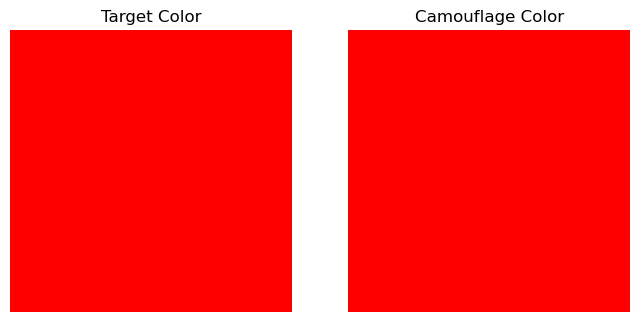

In [7]:
# Create a figure and axis to plot the RGB values
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot each RGB value in its own axis
ax[0].imshow(np.reshape(target_rgb/255, (1, 1, 3)))
ax[1].imshow(np.reshape(best_camouflage/255, (1, 1, 3)))

# Remove the axis labels and grid
ax[0].axis("off")
ax[1].axis("off")

#Add titles
ax[0].set_title("Target Color")
ax[1].set_title("Camouflage Color")
# Show the plot
plt.show()

In [8]:
def calc_fitness(chromosome, target_grid):
    """
    Calculates the fitness of a chromosome by comparing it to the target grid.

    Parameters:
        chromosome (np.array): The chromosome to calculate the fitness for.
        target_grid (np.array): The target grid to compare the chromosome to.

    Returns:
        float: The fitness of the chromosome.
    """
    return np.mean(np.abs(chromosome - target_grid))

In [9]:
def evolve_population(population, target_grid, mutation_rate, elite_ratio):
    """
    Evolves the population by selecting the best chromosomes (elites), breeding them, and mutating the offspring.

    Parameters:
        population (list of np.array): The current population of chromosomes.
        target_grid (np.array): The target grid to compare the chromosomes to.
        mutation_rate (float): The rate of mutation for the offspring.
        elite_ratio (float): The ratio of the population that should be considered as elites.

    Returns:
        list of np.array: The evolved population of chromosomes.
    """
    # Calculate fitness values for each chromosome in the population
    fitness_values = [calc_fitness(c, target_grid) for c in population]

    # Determine the indices of the best chromosomes (elites)
    elite_index = np.argsort(fitness_values)[:int(len(population) * elite_ratio)]

    # Select the best chromosomes (elites) from the population
    elites = [population[i] for i in elite_index]

    # Initialize the new population
    new_population = []

    # Create new offspring by breeding the elites
    while len(new_population) < len(population) - len(elites):
        # Select two parent chromosomes randomly from the elites
        parent1, parent2 = random.choices(elites, k=2)

        # Initialize the child chromosome
        child = np.zeros(parent1.shape)

        # Loop through the elements of the parent chromosomes
        for i in range(len(parent1)):
            for j in range(len(parent1[i])):
                for k in range(len(parent1[i][j])):
                    # Randomly inherit the element from either parent
                    if random.random() < 0.5:
                        child[i][j][k] = parent1[i][j][k]
                    else:
                        child[i][j][k] = parent2[i][j][k]

                    # Mutate the element with a certain probability
                    if random.random() < mutation_rate:
                        child[i][j][k] = np.random.randint(0, 256)

        # Add the child chromosome to the new population
        new_population.append(child)

    # Combine the elites and the offspring to form the evolved population
    return elites + new_population

In [10]:
images =[]
def simulate(size, target_grid, generations, mutation_rate, elite_ratio):
    """
    This function simulates the evolutionary process to generate new images.

    Parameters:
    size (int) : The size of the population.
    target_grid (numpy array) : The target image for the evolutionary process.
    generations (int) : The number of generations to run the simulation for.
    mutation_rate (float) : The rate of mutation of the images in the population.
    elite_ratio (float) : The ratio of the population that will be considered as elites.

    Returns:
    (tuple) : A tuple of the best image generated by the simulation and a list of all images generated in the simulation.
    """
    # The size of each image in the population
    grid_size = (16, 16, 3)
    # initialize the population with random values
    population = [np.random.randint(0, 256, size=grid_size) for _ in range(size)]


    for i in range(generations):
      # evolve the population for each generation
        population = evolve_population(population, target_grid, mutation_rate, elite_ratio)
         # find the chromosome with the best fitness value
        best_fit = min(population, key=lambda c: calc_fitness(c, target_grid))
        # print the generation number and best fitness value
        print(f'Generation {i}: Best fitness {calc_fitness(best_fit, target_grid)}')

        # store the generated image
        images.append(best_fit.astype(np.uint8))

        # commented out code for displaying or saving images
        #fig, ax = plt.subplots()
        #ax.imshow(best_fit.astype(np.uint8))
        #plt.title(f'Generation {i}')
        #fig.tight_layout()
        #plt.show()
        # filename = f'camo_images/yellow/gen_{i}.png'
        # plt.savefig(filename)

    # Return the best fit image and the list of all images
    return min(population, key=lambda c: calc_fitness(c, target_grid)), images

In [11]:
target_grid = np.zeros((16, 16, 3), dtype=np.uint8)
#Red [255, 0, 0]
#Green [0, 154, 23]
target_grid[:] = [255, 0, 0]

pop_size = 100
num_generations = 50
mut_rate = 0.01
elite_ratio = 0.1
best_camouflage, images = simulate(pop_size, target_grid, num_generations, mut_rate, elite_ratio)


     

Generation 0: Best fitness 118.65364583333333
Generation 1: Best fitness 116.27604166666667
Generation 2: Best fitness 113.82291666666667
Generation 3: Best fitness 111.95182291666667
Generation 4: Best fitness 108.50130208333333
Generation 5: Best fitness 104.36067708333333
Generation 6: Best fitness 103.51171875
Generation 7: Best fitness 102.40625
Generation 8: Best fitness 101.35677083333333
Generation 9: Best fitness 100.04557291666667
Generation 10: Best fitness 98.23958333333333
Generation 11: Best fitness 97.26432291666667
Generation 12: Best fitness 95.58072916666667
Generation 13: Best fitness 94.25
Generation 14: Best fitness 93.78645833333333
Generation 15: Best fitness 92.91015625
Generation 16: Best fitness 91.2578125
Generation 17: Best fitness 90.15104166666667
Generation 18: Best fitness 88.22526041666667
Generation 19: Best fitness 87.62760416666667
Generation 20: Best fitness 86.7578125
Generation 21: Best fitness 85.95963541666667
Generation 22: Best fitness 84.7591

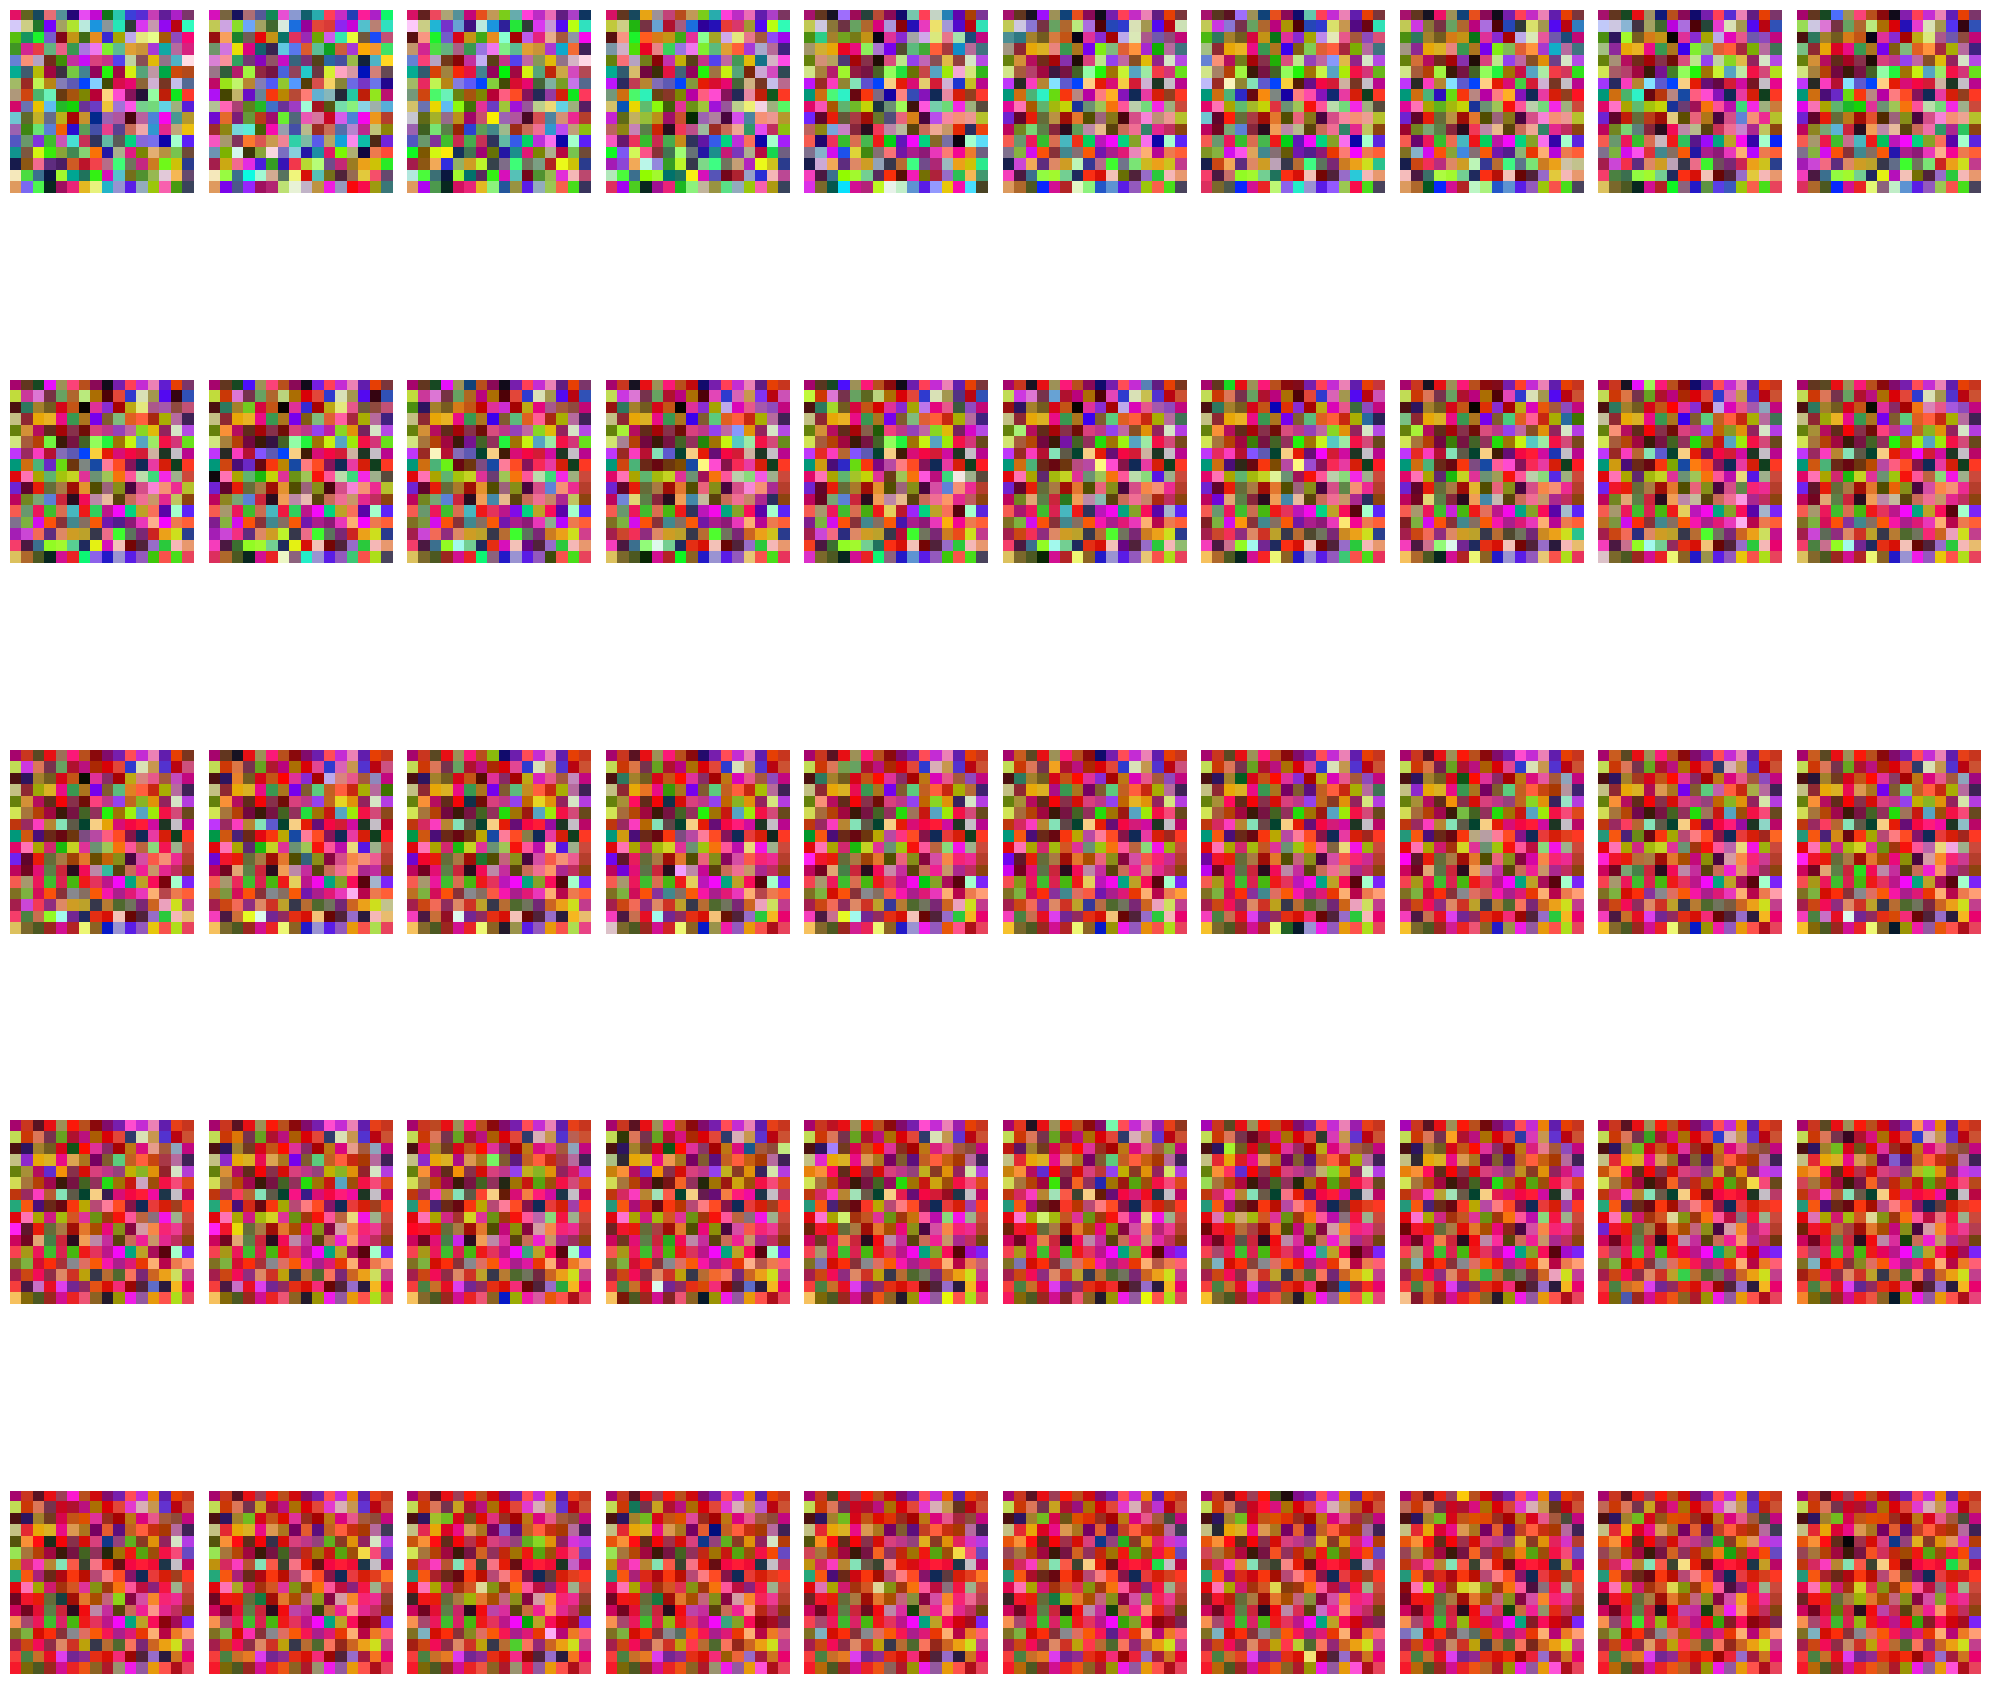

In [12]:
## Function to display a grid of images
def display_images(images, num_images=50, rows=10, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i, ax in enumerate(axs.ravel()):
        if i < num_images:
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
        else:
            fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

# Plot images:

display_images(images, rows=5, cols=10)